#🎬 Business Understanding – Anime Recommendation Model

Meet Ken, an anime enthusiast. Like many fans, Ken has watched the classics (Naruto, Attack on Titan, Death Note), but now he feels lost in the sea of thousands of anime titles. Every weekend, he spends more time scrolling through lists than actually watching.

Streaming platforms and fan communities face the same problem: how do you help fans like Ken discover their next favorite anime quickly and meaningfully?

This dataset provides a golden opportunity — not only to build a system that recommends the right anime at the right time, but also to uncover insights about anime trends and fan behaviors.


## 🎯 Objectives
* Provide actionable trends for streaming services and fan communities:
 * Understand genre popularity
 * Know how long episodes are
 * Rating distributions
 * Ratibg the type (TV/OVA/Movie) patterns.
 * Analyze user behavior: rating habits, consumption trends, fan clusters.
 * Build clear visuals (dashboards/plots, optional network map) to communicate insights.


* Build a personalized engine that:
  * helps fans like Ken discover anime they’ll enjoy
  * reducing choice overload and keeping them engaged.



## ⏰ Why Now?

* The global anime market is exploding, with billions of dollars in streaming investments.
* New anime titles are released constantly, overwhelming fans and making discovery harder.
* Platforms compete fiercely for attention — those with smarter recommendations and data-driven strategies win loyalty.
* Fans increasingly demand personalized experiences, not one-size-fits-all lists.
* In short: without intelligent recommendations and insights, fans like Ken get frustrated, and platforms risk losing them.



##❓ Key Business Questions
* Analytics & Insights:
   * Which genres (and genre combos) are most popular and best-rated?
   * Are there clusters of fans with distinct preferences (e.g., shonen-lovers vs. slice-of-life fans)?
   * Do fans tend to be generous or harsh with ratings?
   * Which anime combine both mass popularity and high ratings (hidden gems vs. overrated hits)?
   * How do type and episode count relate to ratings and popularity?
   * How do users differ (harsh vs generous raters, niche vs mainstream taste)?
   * What clusters of fans/anime exist?

* Recommendation System
   * How can we predict which anime a fan like Ken will enjoy next?
   * Should we rely on similar fans’ tastes (collaborative filtering) or anime attributes like genre/type (content-based)?
   * Can we strike a balance — offering accurate but also novel recommendations, not just the same mainstream titles?   



## ✅ Success Criteria
 * concise set of plots/tables that answer the questions (top genres, episode vs rating, type breakdown).
 * Validated clusters with clear personas (e.g., “Shōnen loyalists”, “Slice-of-life fans”).
 * Actionable insights (e.g., “Short TV shows with Action+Comedy over-index on popularity”).
 * Fans like Ken feel the system “knows their taste”, reporting at least 80% satisfaction with recommendations.
 * The recommendation engine achieves strong ranking performance (Precision@10 > 0.7).
 * Insights lead to clear strategies: e.g., “slice-of-life anime is under-served but has growing demand.”
 * Platforms see higher engagement: more anime watched per user, more ratings given, and longer subscriptions.



## 📊 Success Metrics
* For Analytics:
   * Top Genres/Types → Genre frequency and popularity insights.
   * User Clusters Validity → Metrics like Silhouette Score to ensure meaningful groupings.
   * Engagement Metrics → Avg. ratings per user, most watched shows, retention trends.
   * Business KPIs → Engagement uplift (e.g., +15% more anime watched per month).

* For Recommendations:
   * RMSE/MAE → Accuracy of predicted ratings vs. actual ratings.
   * Precision@k / Recall@k → % of recommended anime that users truly liked.
   * NDCG → Ensures the top recommendations are the most relevant.

✨ In short, success means Ken no longer wastes time scrolling, fans feel more connected to their anime journey, and platforms gain the insights they need to deliver better experiences and retain their audience.

# DATA UNDERSTANDING

## OVERVIEW

This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings.



## Content


### Anime.csv
* **anime_id**:
    * myanimelist.net's unique id identifying an anime.
* **name**:
    * full name of anime.
* **genre**:
    * comma separated list of genres for this anime.
* **type**:
    * movie, TV, OVA, etc.
* **episodes**:
    * how many episodes in this show. (1 if movie).
* **rating**:
    * average rating out of 10 for this anime.
* **members**:
    * number of community members that are in this anime's"group".

### Rating.csv
* **user_id**:
    * non identifiable randomly generated user id.
* **anime_id**:
    * the anime that this user has rated.
* **rating**:
    * rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).



In [2]:
#importing datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
#loading the zip folder
from google.colab import files
uploaded = files.upload()


Saving anime.csv to anime.csv
Saving rating.csv to rating.csv


In [5]:
#viewing the data
pd.set_option('display.max_columns', None)
pd.set_option("display.width", None)
anime=pd.read_csv('/content/anime.csv')
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
ratings=pd.read_csv('/content/rating.csv')
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [7]:
#getting the dataset info
ratings.info(memory_usage="deep", verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   7813737 non-null  int64
 1   anime_id  7813737 non-null  int64
 2   rating    7813737 non-null  int64
dtypes: int64(3)
memory usage: 178.8 MB


In [8]:
#get datset info
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [9]:
#linking the two datasets
merged_df=pd.merge(ratings,anime,left_on='anime_id',right_on='anime_id',how='inner')
# Display the merged DataFrame
print("\nMerged DataFrame:")
merged_df.head()


Merged DataFrame:


,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,1,24,-1,School Rumble,"Comedy, Romance, School, Shounen",TV,26,8.06,178553
2,1,79,-1,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,7.31,158772
3,1,226,-1,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
4,1,241,-1,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395


In [10]:
#merged dataframe info
merged_df.info(memory_usage="deep", verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813727 entries, 0 to 7813726
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   user_id   7813727 non-null  int64  
 1   anime_id  7813727 non-null  int64  
 2   rating_x  7813727 non-null  int64  
 3   name      7813727 non-null  object 
 4   genre     7813617 non-null  object 
 5   type      7813723 non-null  object 
 6   episodes  7813727 non-null  object 
 7   rating_y  7813721 non-null  float64
 8   members   7813727 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 2.2 GB


In [11]:
# Save the DataFrame to a CSV file
merged_df.to_csv('combined_dataset.csv', index=False)

# Data preparation


## Data Cleaning
This includes"
 * exploring our data using methods like(df.head,df.describe,df.info)to get a sense of the data structure,data types and summary statistics
 * manipulating column names for better readability
 * dropping unnecessary columns
 * identify missing values using df.isnull().sum() then fill the missing values appropriately if any,or drop them
 * identify duplicates(df.duplicated() and remove them using df.drop_duplicated)
 * check the data types if they are appropriate for each column if not correct them
 * check and handle outliers appropriately
 * create new features
 * do final checks then save the cleaned data



### Explore the data
This is done to get a sense of the data structure,data types and summary statistics





#### **View the dataset**
to see how our data looks like

In [12]:
#load the merged dataset
df=pd.read_csv('/content/combined_dataset.csv')
#view the dataset
df.head()

/tmp/ipython-input-4110042606.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/combined_dataset.csv')


,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,1,24,-1,School Rumble,"Comedy, Romance, School, Shounen",TV,26,8.06,178553
2,1,79,-1,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,7.31,158772
3,1,226,-1,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
4,1,241,-1,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395


In [13]:
#view the tail
df.tail()

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
7813722,73515,16512,7,Devil Survivor 2 The Animation,"Action, Demons, Supernatural",TV,13,7.06,101266
7813723,73515,17187,9,Ghost in the Shell: Arise - Border:1 Ghost Pain,"Mecha, Police, Psychological, Sci-Fi",Movie,1,7.64,31747
7813724,73515,22145,10,Kuroshitsuji: Book of Circus,"Comedy, Demons, Fantasy, Historical, Shounen, ...",TV,10,8.37,122895
7813725,73516,790,9,Ergo Proxy,"Mystery, Psychological, Sci-Fi",TV,23,8.03,265005
7813726,73516,8074,9,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892


#### get shape of the dataset

In [14]:
#dataset shape
df.shape

(7813727, 9)

#### get statistic summary for our dataset

for both the categorical data and numerical data



In [15]:
#view statistics for our dataset(numerical)
df.describe()

,user_id,anime_id,rating_x,rating_y,members
count,7.813727e+06,7.813727e+06,7.813727e+06,7.813721e+06,7.813727e+06
mean,3.672795e+04,8.909045e+03,6.144036e+00,7.653127e+00,1.786208e+05
std,2.099795e+04,8.883923e+03,3.727796e+00,6.730287e-01,1.881764e+05
min,1.000000e+00,1.000000e+00,-1.000000e+00,1.670000e+00,2.900000e+01
25%,1.897400e+04,1.240000e+03,6.000000e+00,7.270000e+00,4.403000e+04
50%,3.679100e+04,6.213000e+03,7.000000e+00,7.680000e+00,1.104700e+05
75%,5.475700e+04,1.409300e+04,9.000000e+00,8.130000e+00,2.442680e+05
max,7.351600e+04,3.451900e+04,1.000000e+01,9.500000e+00,1.013917e+06


In [16]:
#view statistics for our dataset(categorical)
df.describe(include='O')

,name,genre,type,episodes
count,7813727,7813617,7813723,7813727
unique,11196,3154,6,358
top,Death Note,Hentai,TV,1
freq,39340,62435,5283596,1674407


#### dataset info

In [17]:
#checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813727 entries, 0 to 7813726
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int64  
 1   anime_id  int64  
 2   rating_x  int64  
 3   name      object 
 4   genre     object 
 5   type      object 
 6   episodes  object 
 7   rating_y  float64
 8   members   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 536.5+ MB


### Column manipulation

now that we have a sense of how our data is lets begin with column manipulation.

this includes:
 * checking column names to see they are same
 * change the name to lowercase if necessary
 * remove whitespaces in the column names and also in the data
 * rename columns for better understanding
 * drop unnecessary columns.




#### check column names

In [18]:
#check columns
df.columns

Index(['user_id', 'anime_id', 'rating_x', 'name', 'genre', 'type', 'episodes',
       'rating_y', 'members'],
      dtype='object')

Our column names are ok. let's move on to the next thing

#### Remove whitespaces
Here we are removing the whitepaces found in the column names and ensure that all string and categorical values are clean and consistent

In [19]:
# Strip white spaces in values
df = df.apply(lambda col: col.str.strip() if col.dtype == ["object", "number", "category"] else col)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813727 entries, 0 to 7813726
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int64  
 1   anime_id  int64  
 2   rating_x  int64  
 3   name      object 
 4   genre     object 
 5   type      object 
 6   episodes  object 
 7   rating_y  float64
 8   members   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 536.5+ MB


In [20]:
#view the data
df.head()

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,1,24,-1,School Rumble,"Comedy, Romance, School, Shounen",TV,26,8.06,178553
2,1,79,-1,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,7.31,158772
3,1,226,-1,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
4,1,241,-1,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395


In [21]:
#view the tail
df.tail()

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
7813722,73515,16512,7,Devil Survivor 2 The Animation,"Action, Demons, Supernatural",TV,13,7.06,101266
7813723,73515,17187,9,Ghost in the Shell: Arise - Border:1 Ghost Pain,"Mecha, Police, Psychological, Sci-Fi",Movie,1,7.64,31747
7813724,73515,22145,10,Kuroshitsuji: Book of Circus,"Comedy, Demons, Fantasy, Historical, Shounen, ...",TV,10,8.37,122895
7813725,73516,790,9,Ergo Proxy,"Mystery, Psychological, Sci-Fi",TV,23,8.03,265005
7813726,73516,8074,9,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892


#### renaming columns

In [22]:
#renaming column names
df = df.rename(columns = {'rating_x':'ratings_from_user', 'rating_y':'anilist_ratings','name':'anime_name','members':'anime_group_members'})
#check column names
df.columns

Index(['user_id', 'anime_id', 'ratings_from_user', 'anime_name', 'genre',
       'type', 'episodes', 'anilist_ratings', 'anime_group_members'],
      dtype='object')

### Missing Values



In [23]:
mis=df.isna().any().sum()
if mis > 0:
    print(f'\nThere are {mis} columns missing values  in our data.')
else:
    print('There are no columns missing values in our data.')


There are 3 columns missing values  in our data.


In [24]:
#checking for missing values
df.isna().sum()

,0
user_id,0
anime_id,0
ratings_from_user,0
anime_name,0
genre,110
type,4
episodes,0
anilist_ratings,6
anime_group_members,0


In [25]:
#create a function to calculate missing values and their percentage
def missing_values_percentage(df):

    # Total rows
    total_records = len(df)

    # Missing values
    missing_values = df.isnull().sum()

    # Percent missing values
    percent_missing_values = (missing_values/ total_records) * 100

    # # Get the data types of each column
    data_types = df.dtypes

    # create summary dataframe
    missing_values_df = pd.DataFrame({
         'missing_values': missing_values,
         'percentage (%)': percent_missing_values,
         'data_type': data_types
    })

    print(f"Total records: {total_records}")

    return missing_values_df

# View the dataframe
missing_summary =missing_values_percentage(df)
missing_summary

Total records: 7813727


,missing_values,percentage (%),data_type
user_id,0,0.000000,int64
anime_id,0,0.000000,int64
ratings_from_user,0,0.000000,int64
anime_name,0,0.000000,object
genre,110,0.001408,object
type,4,0.000051,object
episodes,0,0.000000,object
anilist_ratings,6,0.000077,float64
anime_group_members,0,0.000000,int64


I'll go for dropping these rows so as not to add data that is incorrect and would affect the analysis  

In [26]:
#drop rows with missing values
df=df.dropna()

In [27]:
#check missing values sing the function
missing_summary =missing_values_percentage(df)
missing_summary

Total records: 7813611


,missing_values,percentage (%),data_type
user_id,0,0.0,int64
anime_id,0,0.0,int64
ratings_from_user,0,0.0,int64
anime_name,0,0.0,object
genre,0,0.0,object
type,0,0.0,object
episodes,0,0.0,object
anilist_ratings,0,0.0,float64
anime_group_members,0,0.0,int64


no more missing values present in our data

### Duplicates

In [28]:
#check for duplicates
dup = df.duplicated().sum()
if dup > 0:
    print(f'\nThere are {dup} duplicates present in our data.')
else:
    print('There are no duplicates in our data.')


There are 1 duplicates present in our data.


In [29]:
# Remove duplicates
df=df.drop_duplicates()

In [30]:
# Check for duplicates
dup = df.duplicated().sum()
if dup > 0:
    print(f'\nThere are {dup} duplicates present in our data.')
else:
    print('There are no duplicates in our data.')

There are no duplicates in our data.


### Checking the data types
to see if they are appropriate for each column

In [31]:
#check dtypes
df.dtypes

,0
user_id,int64
anime_id,int64
ratings_from_user,int64
anime_name,object
genre,object
type,object
episodes,object
anilist_ratings,float64
anime_group_members,int64


### Checking outliers

In [32]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns:", numeric_cols)

Numeric columns: ['user_id', 'anime_id', 'ratings_from_user', 'anilist_ratings', 'anime_group_members']


In [33]:
outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Get outlier values
    outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    outliers[col] = outlier_values

# Print columns with outliers
for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")

user_id: 0 outliers
anime_id: 5612 outliers
ratings_from_user: 1493109 outliers
anilist_ratings: 101111 outliers
anime_group_members: 522876 outliers


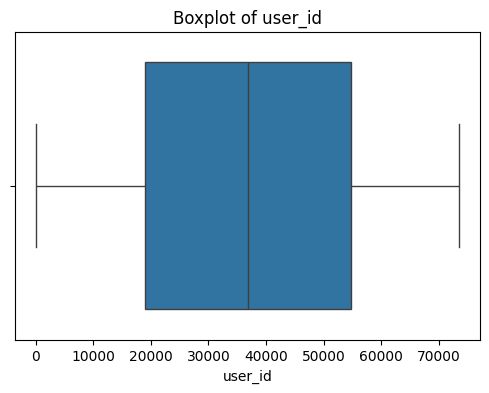

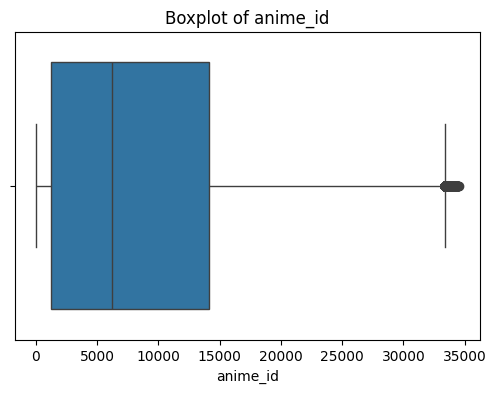

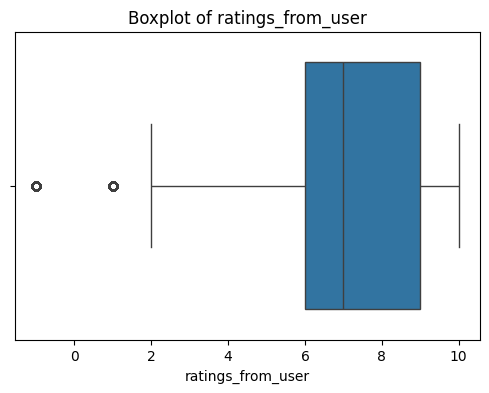

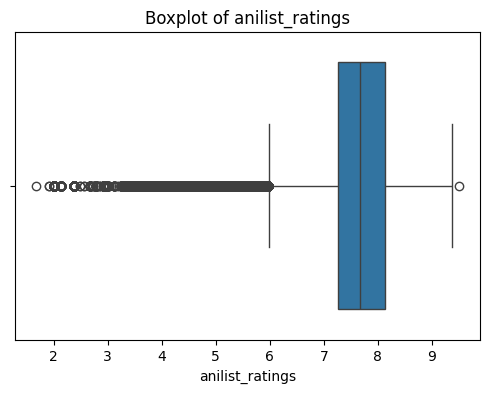

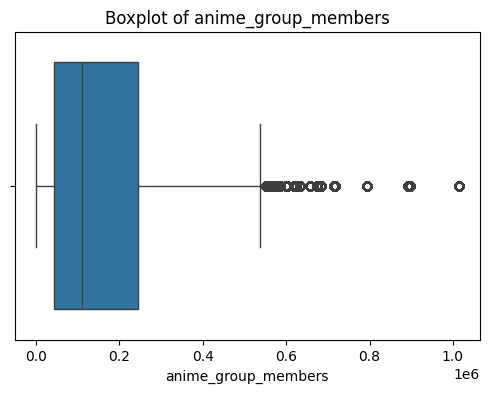

In [34]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

there's plenty of outliers but we decided to keep them

### Feature engineering
this involes making of new columns or transforming existing features

#### Exploding the genre column
In the genre column, there are some anime with multiple genres. If you leave it like that it wouldn't be analysis-friendly hence we decided to clean it. This is done by: split then explode so each (anime, genre) is its own row.

In [1]:
# Split on comma
df["genre"] = df["genre"].str.split(",")

# Explode → one row per (anime, genre)
df = df.explode("genre")

NameError: name 'df' is not defined

In [ ]:
# 4. Strip whitespace and standardize casing
df["genre"] = (
    df["genre"]
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)  # remove double spaces
    .str.title()  # e.g. "sci-fi" -> "Sci-Fi"
)

In [ ]:
#view the dataset
df.head()

#### Type: normalize categories (TV/OVA/Movie/Special/ONA/Music)

In [ ]:
# Normalize 'type' to a fixed set; anything else → 'Other' or 'Unknown' if null
allowed = {"TV", "OVA", "Movie", "Special", "ONA", "Music"}

def normalize_type(x):
    if pd.isna(x) or str(x).strip() == "":
        return "Unknown"
    t = str(x).strip().upper()
    # Map common variants to the canonical six
    if t in {"TV", "TV SERIES", "TV-SERIES", "TELEVISION"}: return "TV"
    if t in {"TV SHORT", "SHORT TV"}: return "TV"       # collapse shorts into TV
    if t in {"MOVIE", "FILM"}:        return "Movie"
    if t in {"OVA"}:                  return "OVA"
    if t in {"ONA"}:                  return "ONA"
    if t in {"SPECIAL"}:              return "Special"
    if t in {"MUSIC"}:                return "Music"
    return "Other"

df["type_norm"] = df["type"].apply(normalize_type).astype("category")
df["type_norm"].value_counts(dropna=False)


#### Episodes: coerce non-numeric to NaN, create bins (≤13, 14–26, 27–52, >52)

In [ ]:
# Coerce to numeric first
df["episodes"] = pd.to_numeric(df["episodes"], errors="coerce")

# Define bins and custom labels
bins = [0, 13, 26, 52, float("inf")]
labels = ["Short (≤13)", "Medium (14–26)", "Long (27–52)", "Very Long (>52)"]

anime["episode_length"] = pd.cut(anime["episodes"], bins=bins, labels=labels, right=True)

# Preview
df.head(10)
